Name: Srihari Narendra Kamath
ID: ACG2210201105018

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [5]:
# Get the stock quote
df = pd.read_csv('/content/AAPL_Train.csv',index_col='Date',parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.251436,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.643711,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.181007,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.202663,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.320068,283192000
...,...,...,...,...,...,...
2021-11-29,159.369995,161.190002,158.789993,160.240005,160.240005,88748200
2021-11-30,159.990005,165.520004,159.919998,165.300003,165.300003,174048100
2021-12-01,167.479996,170.300003,164.529999,164.770004,164.770004,152052500


In [6]:
df.shape # Get rows and columns

(1492, 6)

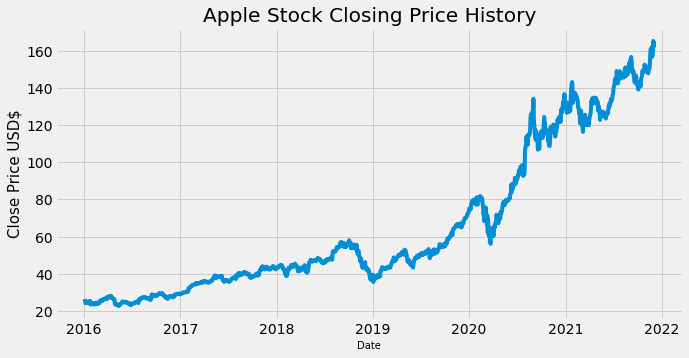

In [7]:
# Visualize the closing price
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Apple Stock Closing Price History')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price USD$',fontsize=15)
plt.show()

In [8]:
#Create a dataframe with only 'Close' Column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1194

In [9]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02629367],
       [0.02166907],
       [0.01814806],
       ...,
       [0.99628631],
       [0.98920921],
       [0.97575583]])

In [10]:
# Creating the training dataset
# Creating the scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train,y_train datasets
x_train=[]
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)

[array([0.02629367, 0.02166907, 0.01814806, 0.01070315, 0.01159655,
       0.01434678, 0.01685177, 0.01234979, 0.016081  , 0.01189433,
       0.01107103, 0.01129875, 0.0104404 , 0.01940932, 0.01594087,
       0.01690432, 0.00539538, 0.00656904, 0.0122622 , 0.01066812,
       0.00725223, 0.01052798, 0.01096592, 0.00644641, 0.00818065,
       0.0081456 , 0.00688435, 0.00588586, 0.00639386, 0.01103599,
       0.01362857, 0.01037033, 0.00998494, 0.0114564 , 0.0076201 ,
       0.01009005, 0.0112462 , 0.01150897, 0.01112358, 0.01785027,
       0.01823565, 0.01954946, 0.0221946 , 0.02019761, 0.01872614,
       0.0188838 , 0.01897138, 0.02088079, 0.02133623, 0.02494483,
       0.02737975, 0.02708196, 0.02729216, 0.02727465, 0.02869356,
       0.02766002, 0.02685423, 0.0260134 , 0.03037523, 0.0336685 ])]
[0.03267000574095211]


In [11]:
#Convert x_train,y_train dataset to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1134, 60, 1)

In [13]:
# Building the RNN
model = Sequential()

#Adding the first LSTM layer and some Dropout Regularisation
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout Regularisation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

#Adding third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

#Adding fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units=1))

In [14]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
#Train the model
model.fit(x_train,y_train,batch_size=32,epochs=30)

Epoch 1/30
36/36 [==============================] - 13s 139ms/step - loss: 0.0079
Epoch 2/30
36/36 [==============================] - 5s 126ms/step - loss: 0.0020
Epoch 3/30
36/36 [==============================] - 5s 136ms/step - loss: 0.0016
Epoch 4/30
36/36 [==============================] - 5s 140ms/step - loss: 0.0014
Epoch 5/30
36/36 [==============================] - 5s 131ms/step - loss: 0.0013
Epoch 6/30
36/36 [==============================] - 5s 133ms/step - loss: 0.0011
Epoch 7/30
36/36 [==============================] - 5s 133ms/step - loss: 0.0012
Epoch 8/30
36/36 [==============================] - 5s 135ms/step - loss: 0.0012
Epoch 9/30
36/36 [==============================] - 5s 135ms/step - loss: 0.0010
Epoch 10/30
36/36 [==============================] - 5s 133ms/step - loss: 0.0011
Epoch 11/30
36/36 [==============================] - 5s 137ms/step - loss: 0.0010
Epoch 12/30
36/36 [==============================] - 6s 171ms/step - loss: 9.5727e-04
Epoch 13/30
36/36 [=

In [16]:
# Create testing dataset
# Create a new array containing scaled values from 1134 to 1492
test_data = scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
 x_test.append(test_data[i-60:i,0])

In [17]:
# Convert the data into numpy arrary
x_test=np.array(x_test)

In [18]:
# Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
# Get the models predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [20]:
# Get Root Mean Squared Error
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

4.243980131272537


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


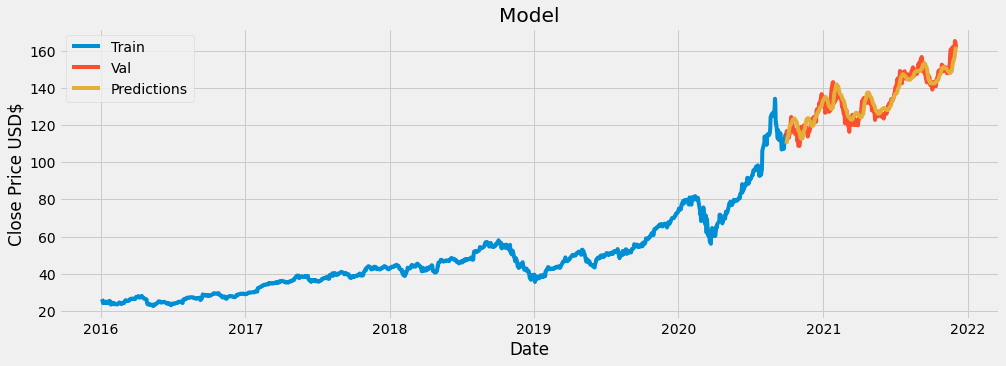

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(15,5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD$')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [22]:
# Show the valid and predicted price
valid

,Close,Predictions
Date,,
2020-09-30,115.809998,109.948738
2020-10-01,116.790001,111.175247
2020-10-02,113.019997,112.736336
2020-10-05,116.500000,114.441933
2020-10-06,113.160004,116.164780
...,...,...
2021-11-29,160.240005,156.398560
2021-11-30,165.300003,158.241531
2021-12-01,164.770004,159.846893


In [24]:
# Get the quote
apple_quote = pd.read_csv('/content/AAPL_Train.csv')
#Create a new dataframe
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price value and convert the dataframe into an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
# Create an empty list
X_test=[]
# Append the last 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape  the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[162.9725]]


In [26]:
#Get the quote
apple_quote2 = pd.read_csv('/content/AAPL_Prediction.csv')
apple_quote_new = apple_quote2[['Date','Close']]
print(apple_quote_new)

            Date       Close
0     03-01-2012   14.686786
1     04-01-2012   14.765714
2     05-01-2012   14.929643
3     06-01-2012   15.085714
4     09-01-2012   15.061786
...          ...         ...
2494  30-11-2021  165.300003
2495  01-12-2021  164.770004
2496  02-12-2021  163.759995
2497  03-12-2021  161.839996
2498  06-12-2021  165.320007

[2499 rows x 2 columns]
